# Optimizing Diabetes Detection: A Comparative Study of Machine Learning Classifiers

Diabetes is a major health concern worldwide, and early detection can play a crucial role in mitigating its impact.
Machine learning has become a powerful tool in healthcare, offering solutions to predict diseases like diabetes by analyzing patterns in clinical and health data.
This project  explore and compare different machine learning algorithms—Logistic Regression, Random Forest, and Decision Tree—to classify individuals as Diabetic or Non-Diabetic using a dataset containing key health indicators.


### 1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")




### 2. Load  Data

In [2]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Data Overview

In [3]:

# Display basic information
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print("\nSummary Statistics:")
diabetes_data.describe()


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4. Data Cleaning

In [5]:
# duplicate rows in the dataset
num_duplicates = diabetes_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [6]:
print("\nMissing values per column before cleaning:")
print(diabetes_data.isnull().sum())


Missing values per column before cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 5. EDA

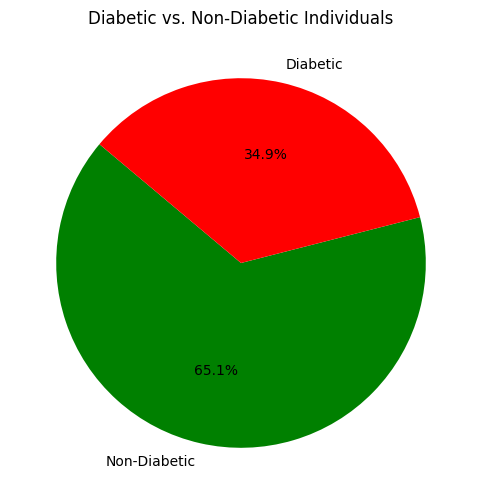

In [7]:
# Plot a Pie Chart showing the proportion of diabetic vs. non-diabetic individuals
outcome_counts = diabetes_data['Outcome'].value_counts()

# Create a Pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=["Non-Diabetic", "Diabetic"], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("Diabetic vs. Non-Diabetic Individuals")
plt.show()


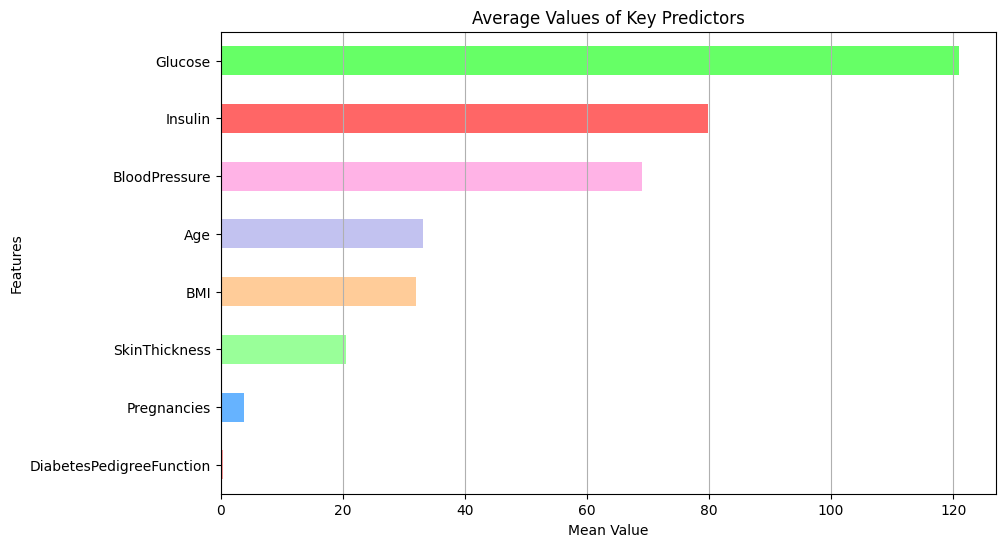

In [8]:
# Calculate means for key numerical features
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
feature_means = diabetes_data[selected_features].mean().sort_values()

# Define a list of colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#66ff66']

# Plot a horizontal bar graph with different colors
plt.figure(figsize=(10, 6))
feature_means.plot(kind='barh', color=colors)
plt.title("Average Values of Key Predictors")
plt.xlabel('Mean Value')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


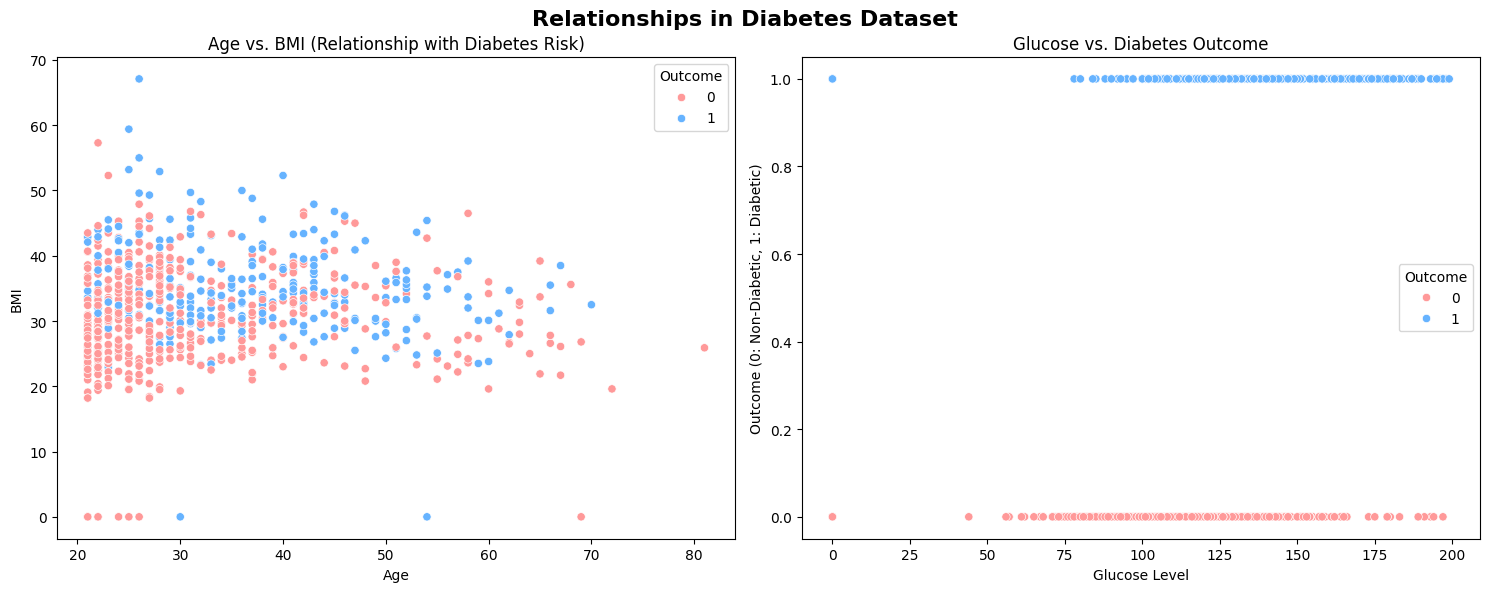

In [9]:
# Create a figure with 1 row and 2 columns for subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Overall title for the figure
plt.suptitle('Relationships in Diabetes Dataset', fontsize=16, fontweight='bold')

# Scatter plot of Age vs. BMI
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=diabetes_data, ax=ax[0], palette=['#ff9999', '#66b3ff'])
ax[0].set_title('Age vs. BMI (Relationship with Diabetes Risk)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('BMI')

# Scatter plot of Glucose vs. Outcome
sns.scatterplot(x='Glucose', y='Outcome', hue='Outcome', data=diabetes_data, ax=ax[1], palette=['#ff9999', '#66b3ff'])
ax[1].set_title('Glucose vs. Diabetes Outcome')
ax[1].set_xlabel('Glucose Level')
ax[1].set_ylabel('Outcome (0: Non-Diabetic, 1: Diabetic)')

plt.tight_layout()  # Adjust spacing
plt.subplots_adjust(top=0.9)  # Fine-tune the spacing to accommodate the suptitle
plt.show()


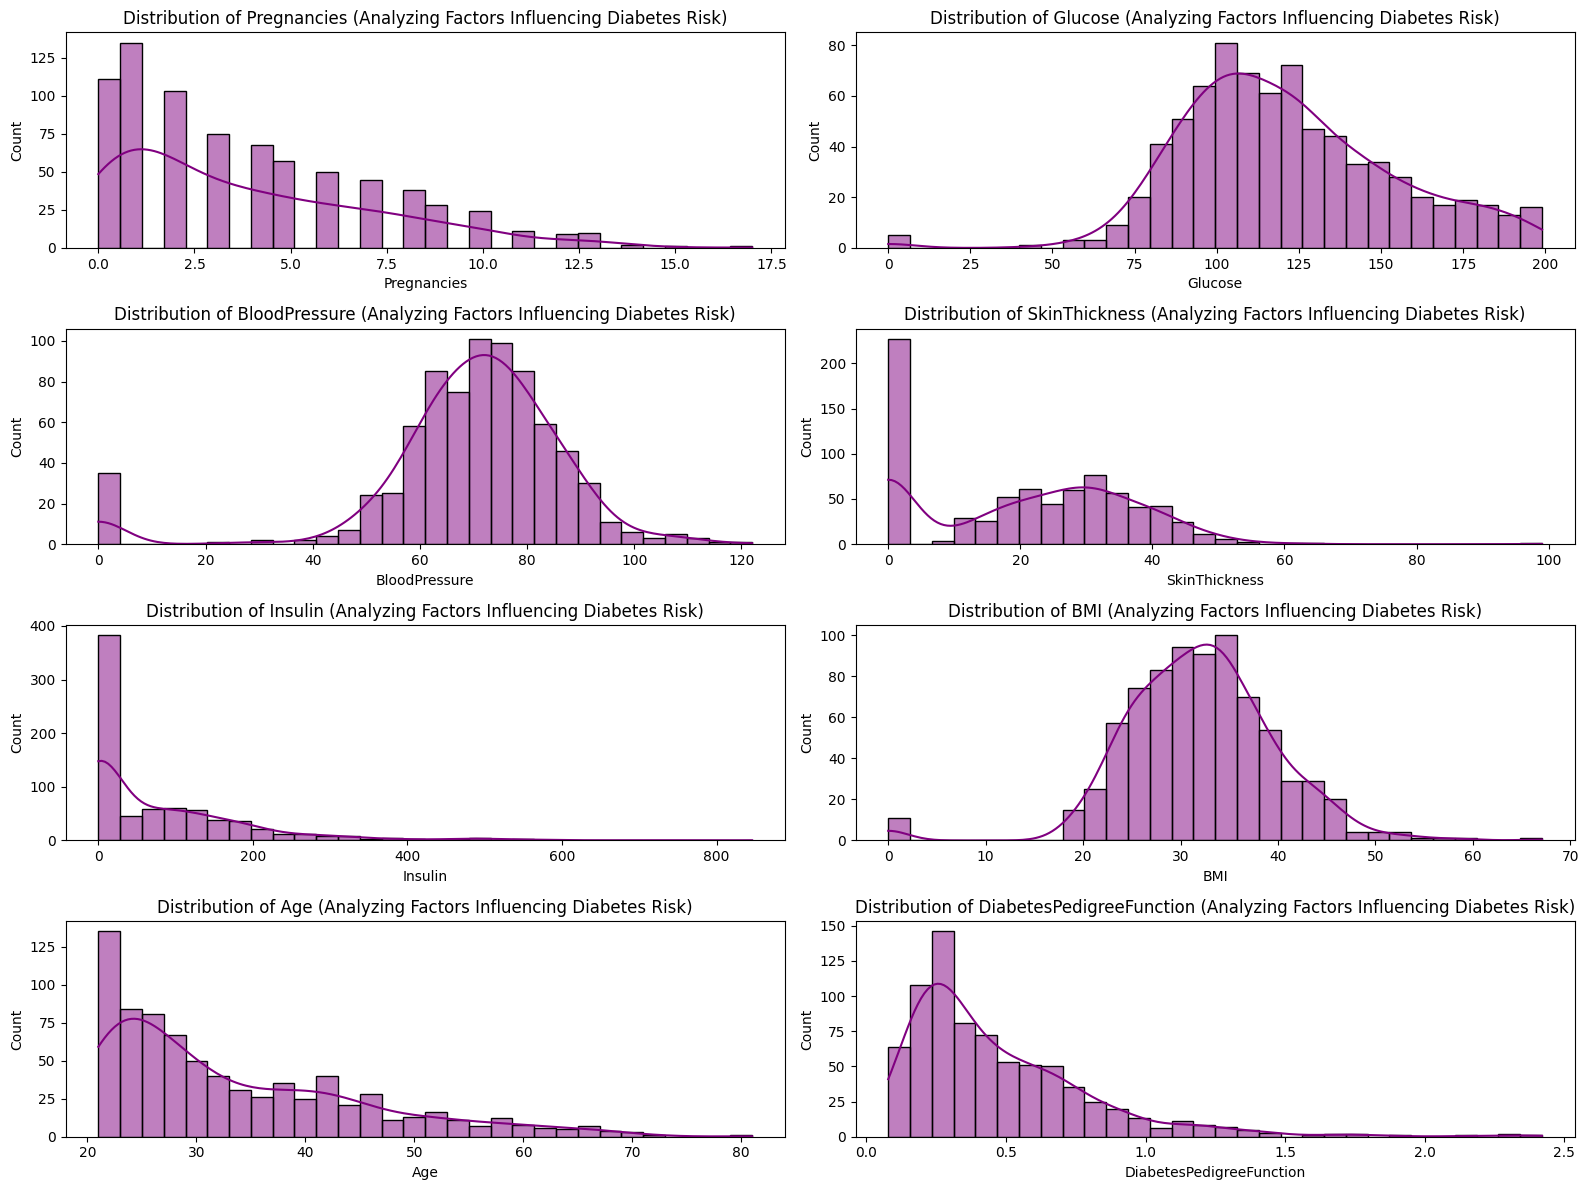

In [10]:
# Plot histograms for key numerical features
num_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(diabetes_data[feature], kde=True, color="purple", bins=30)
    plt.title(f"Distribution of {feature} (Analyzing Factors Influencing Diabetes Risk)")

plt.tight_layout()
plt.show()



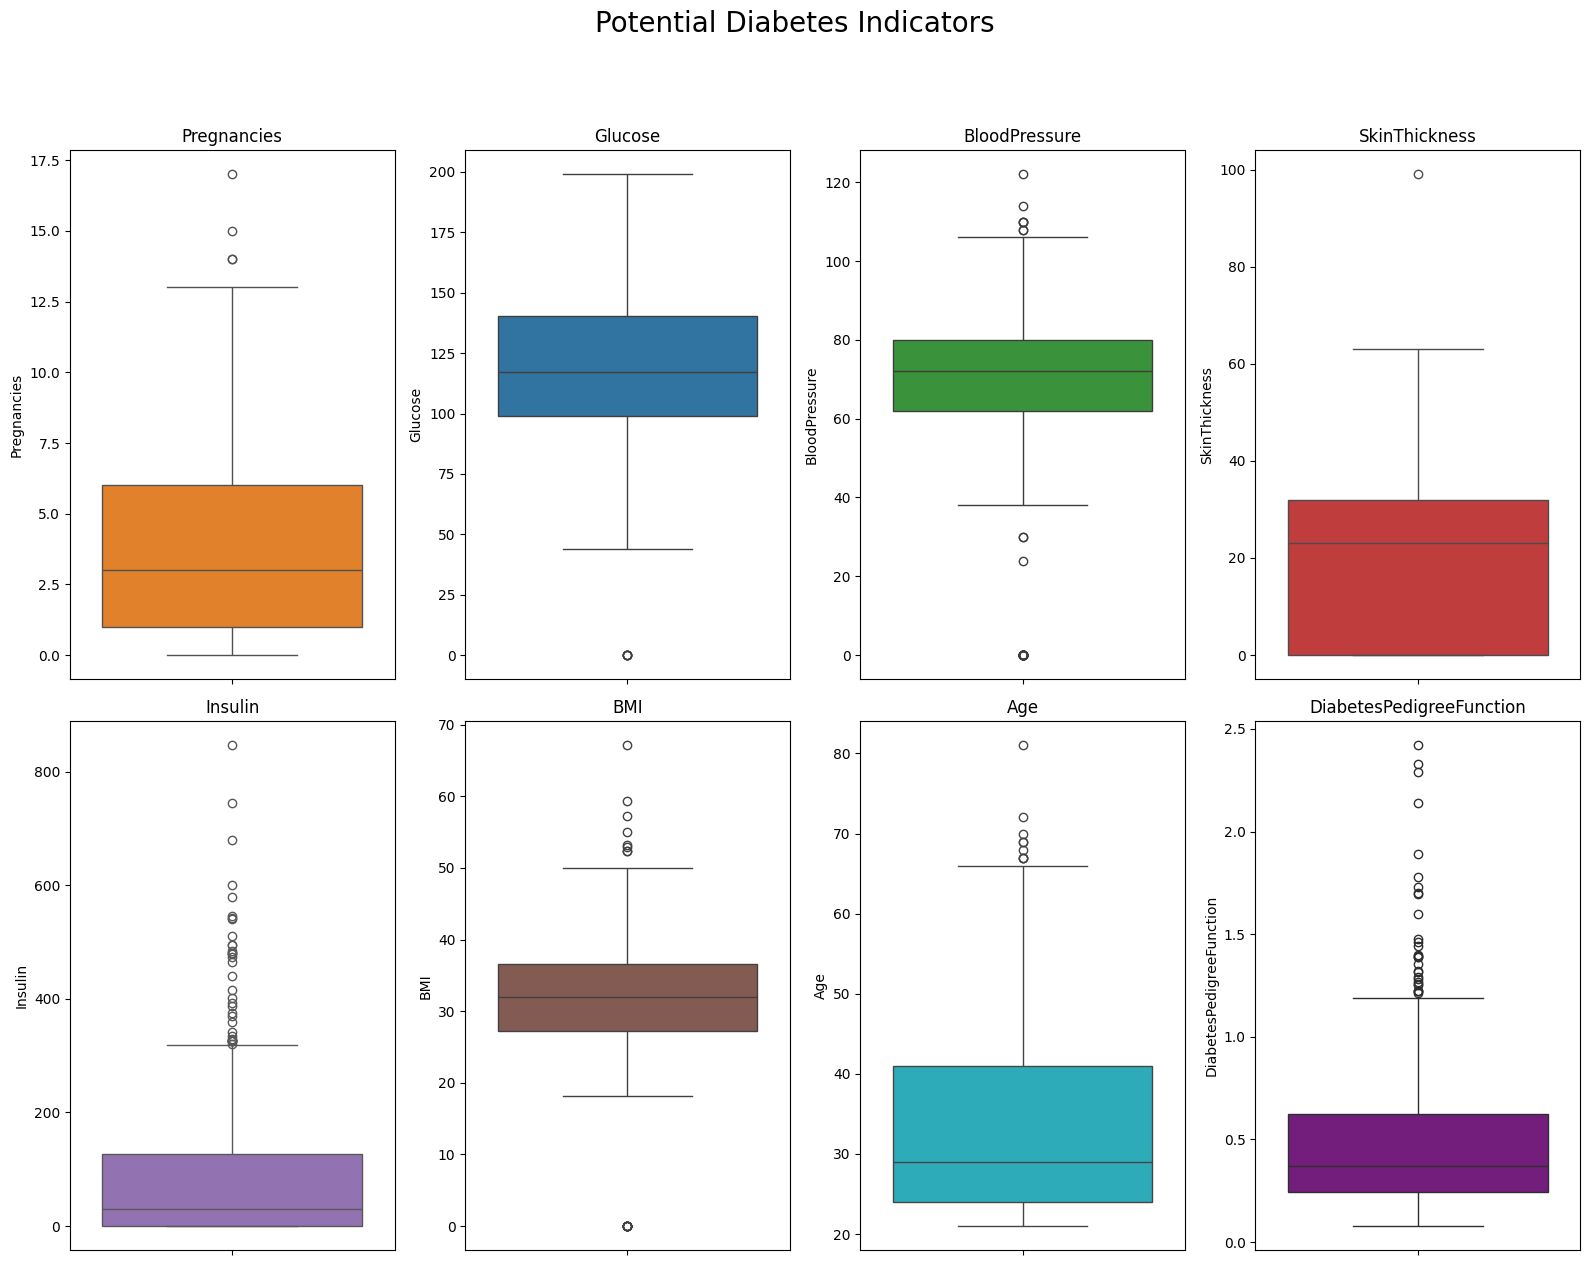

In [11]:
# Define unique colors for each feature
feature_colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#7f0e8c']

# Box plots to detect outliers with unique colors for each feature
plt.figure(figsize=(16, 12))
plt.suptitle('Potential Diabetes Indicators', fontsize=20, y=1.05)  # Main title

for i, (feature, color) in enumerate(zip(num_features, feature_colors), 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=diabetes_data[feature], color=color)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()


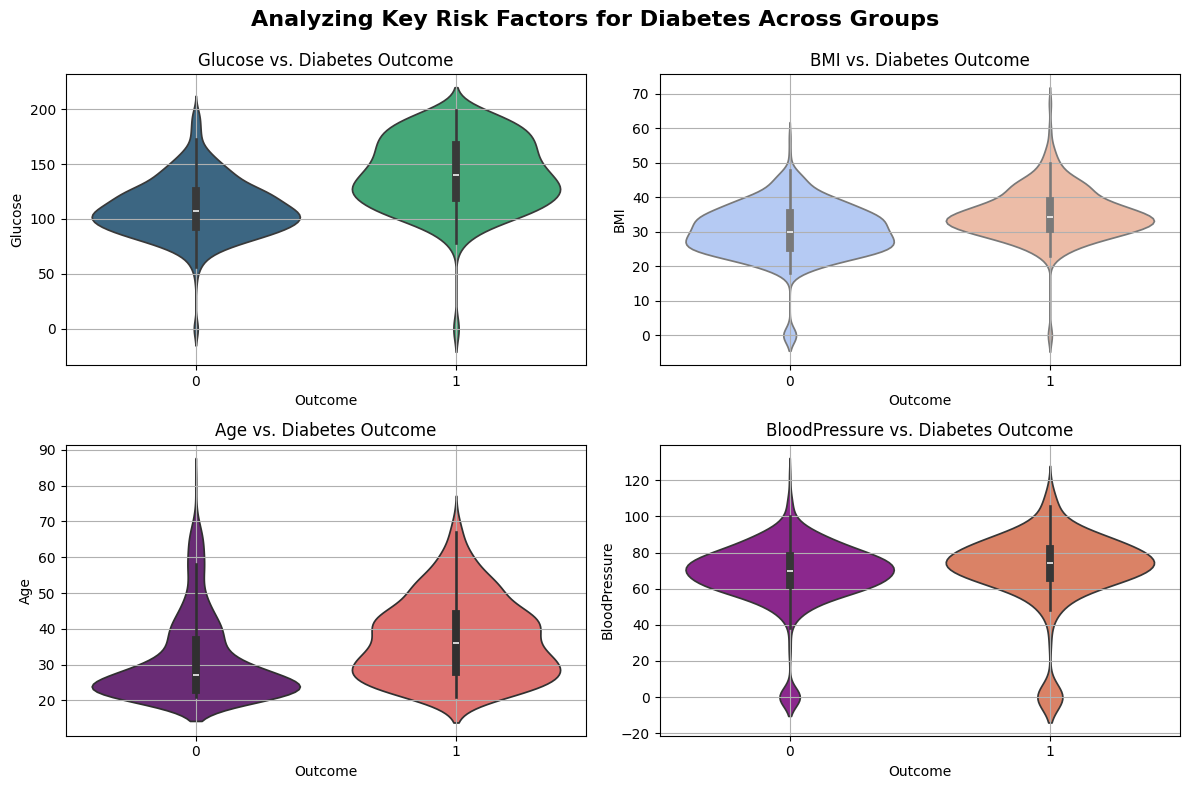

In [12]:
# Define a list of selected features to visualize
selected_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Add an overall title to the figure
plt.suptitle('Analyzing Key Risk Factors for Diabetes Across Groups', fontsize=16, fontweight='bold')

# Define colors for the plots
colors = ["viridis", "coolwarm", "magma", "plasma"]

# Generate boxplots and violin plots in a 2x2 grid
for i, feature in enumerate(selected_features):
    ax = axes[i // 2, i % 2]  # Determine the subplot location
    sns.violinplot(x='Outcome', y=feature, data=diabetes_data, ax=ax, palette=colors[i])
    ax.set_title(f"{feature} vs. Diabetes Outcome")
    ax.set_xlabel('Outcome')
    ax.set_ylabel(feature)
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to avoid overlapping text
plt.subplots_adjust(top=0.9)  # Ensure there's room for the title
plt.show()


<Figure size 1000x1000 with 0 Axes>

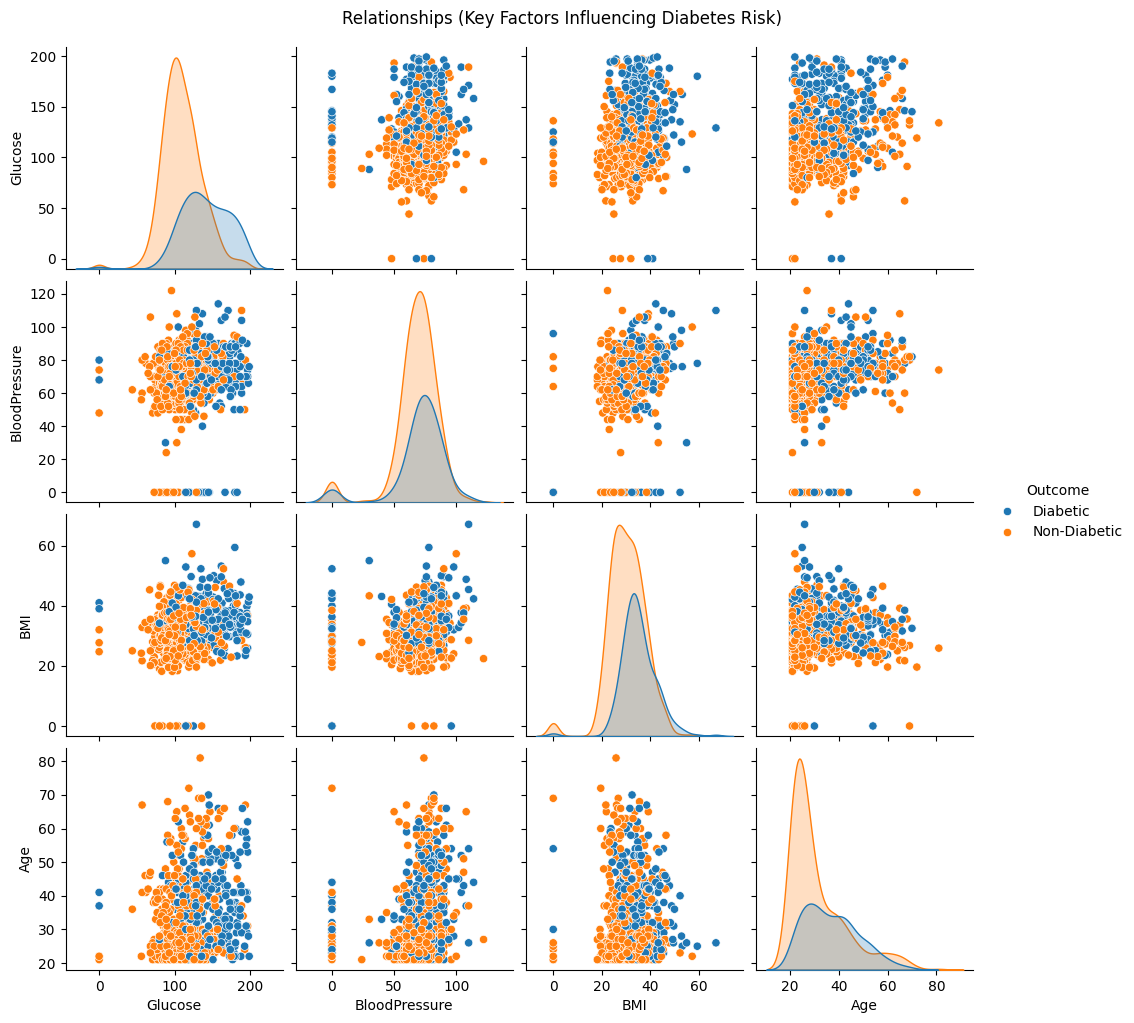

In [13]:
# Map target classes to more descriptive labels
diabetes_data['Outcome'] = diabetes_data['Outcome'].map({0: "Non-Diabetic", 1: "Diabetic"})

# Pair plots to show relationships between key predictors and diabetes outcome
plt.figure(figsize=(10, 10))
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
sns.pairplot(diabetes_data, hue='Outcome', vars=selected_features)
plt.suptitle("Relationships (Key Factors Influencing Diabetes Risk)", y=1.02)

plt.show()


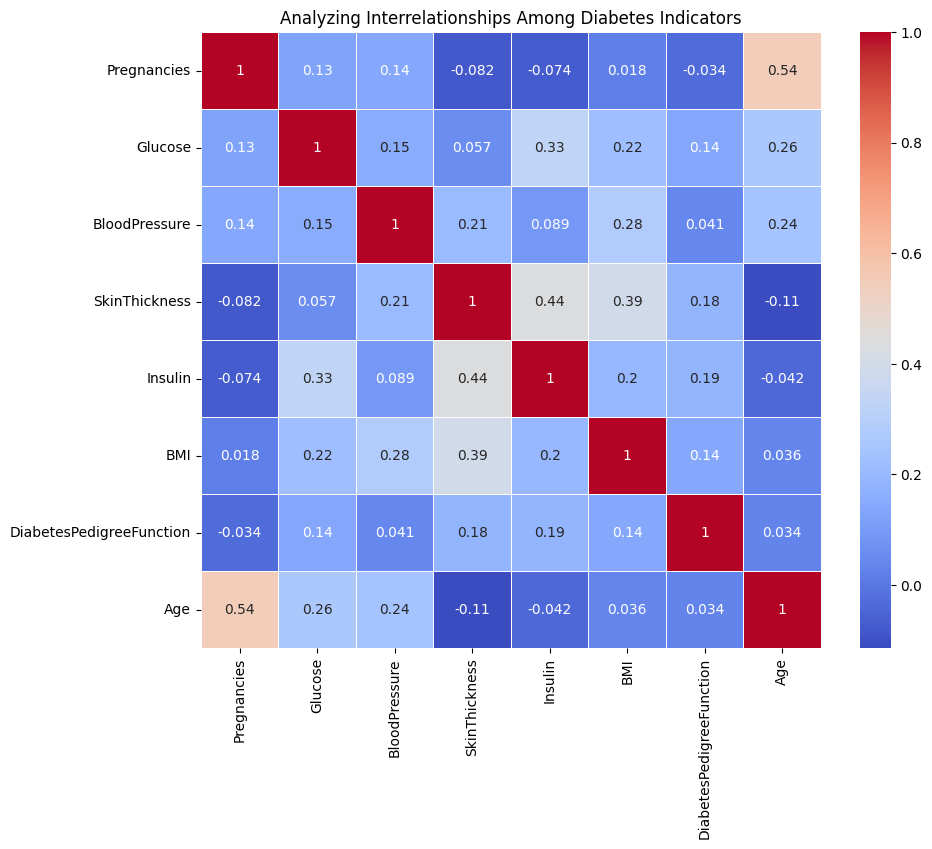

In [14]:
# Correlation heatmap to observe relationships across predictors
# Only include numeric columns for correlation calculation
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation analysis
numeric_data = diabetes_data.select_dtypes(include=[np.number])
cor_matrix = numeric_data.corr()

# Generate the heatmap
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Analyzing Interrelationships Among Diabetes Indicators")

plt.show()


### 6. Training

In [15]:
# Define features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8.Logistic Regression

In [16]:
# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\nLogistic Regression Accuracy: {accuracy_log_reg:.2f}")



Logistic Regression Accuracy: 0.75


In [17]:

# Classification Report
log_reg_report = classification_report(y_test, y_pred_log_reg, target_names=["Non-Diabetic", "Diabetic"])
print("\nLogistic Regression - Classification Report:")
print(log_reg_report)




Logistic Regression - Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.64      0.67      0.65        55
    Diabetic       0.81      0.79      0.80        99

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



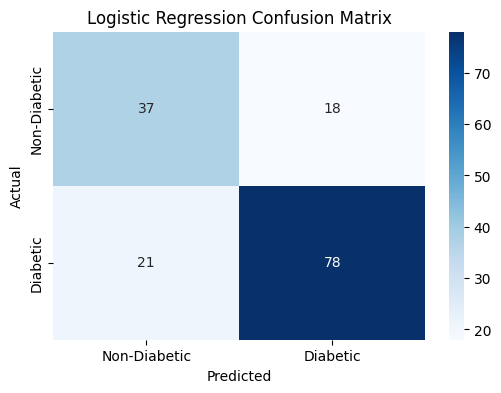

In [18]:
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 9. Random Forest model

In [19]:
# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)
y_probs_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")





Random Forest Accuracy: 0.72


In [20]:
# Classification Report
rf_report = classification_report(y_test, y_pred_rf, target_names=["Non-Diabetic", "Diabetic"])
print("\nRandom Forest - Classification Report:")
print(rf_report)




Random Forest - Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.61      0.62      0.61        55
    Diabetic       0.79      0.78      0.78        99

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



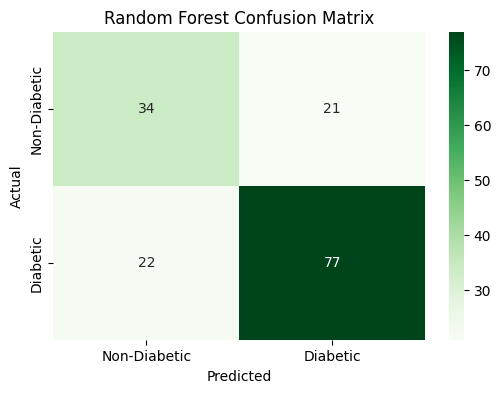

In [21]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 10. Decision Tree Classifier

In [22]:
# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Classifier Accuracy: {accuracy_dt:.2f}")




Decision Tree Classifier Accuracy: 0.75


In [23]:
# Classification Report
dt_report = classification_report(y_test, y_pred_dt, target_names=["Non-Diabetic", "Diabetic"])
print("\nDecision Tree - Classification Report:")
print(dt_report)




Decision Tree - Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.62      0.73      0.67        55
    Diabetic       0.83      0.76      0.79        99

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



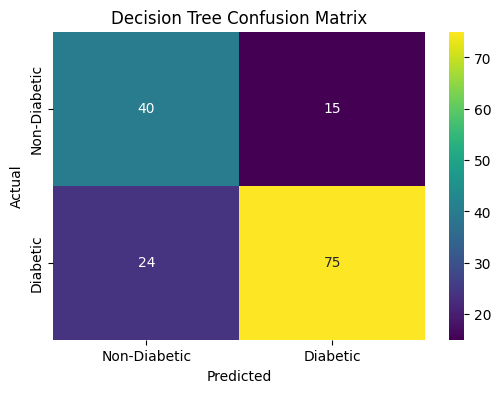

In [24]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='viridis', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




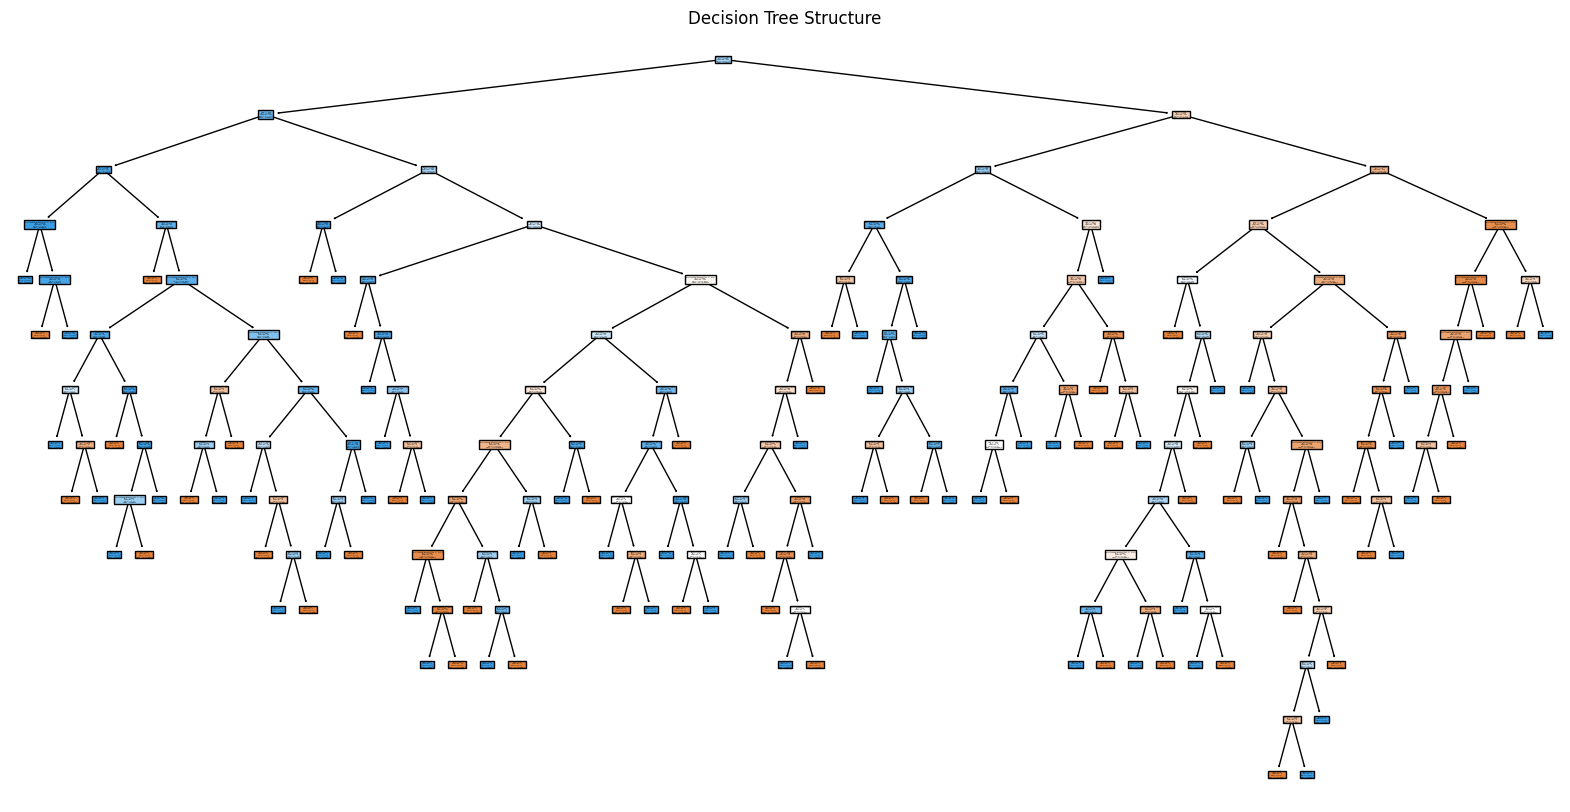

In [25]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], filled=True)
plt.title("Decision Tree Structure")
plt.show()

## ROC Curves for Logistic Regression, Random Forest, and Decision Tree

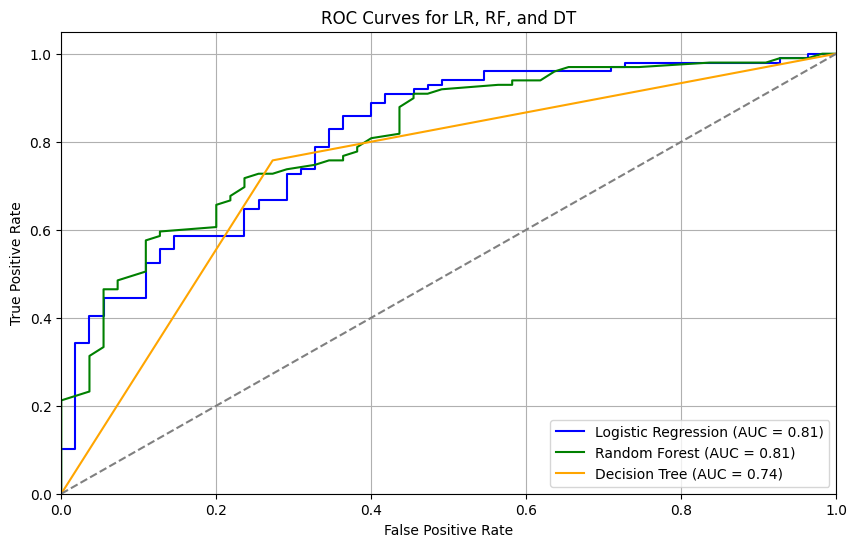

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

# Encode target labels: "Diabetic" -> 1, "Non-Diabetic" -> 0
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # y_test now contains 0 and 1

# Logistic Regression ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_encoded, log_reg.predict_proba(X_test)[:, 1])
auc_log_reg = roc_auc_score(y_test_encoded, log_reg.predict_proba(X_test)[:, 1])

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, random_forest.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test_encoded, random_forest.predict_proba(X_test)[:, 1])

# Decision Tree ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, decision_tree.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test_encoded, decision_tree.predict_proba(X_test)[:, 1])

# Plot ROC curves for all three models
plt.figure(figsize=(10, 6))

plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})', color='b')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='g')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LR, RF, and DT')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()
